In [232]:
# Imported the required libraries and dependencies.

import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline

In [233]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters

bitstamp_df = pd.read_csv(Path('Resources/bitstamp.csv'), index_col='Timestamp', parse_dates=True, infer_datetime_format=True)

In [234]:
# Used the ".head" function to confirm that the data was imported properly.

bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [235]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters

coinbase_df = pd.read_csv(Path('Resources/coinbase.csv'), index_col='Timestamp', parse_dates=True, infer_datetime_format=True)

In [236]:
# Used the ".head" function to confirm that the data was imported properly.

coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [237]:
# Dropped all NaNs or missing values in the DataFrame

bitstamp_df.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


In [238]:
# Used the "str.replace" function to remove the dollar sign from the data frame

bitstamp_df.loc[:,'Close'] = bitstamp_df.loc[:,'Close'].str.replace('$',"")
bitstamp_df

/Users/thomas/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


In [239]:
#Checked the datatypes

bitstamp_df.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [240]:
# Converted the "Close" data type to a float

bitstamp_df.loc[:, 'Close'] = bitstamp_df.loc[:, 'Close'].astype('float')

In [241]:
# Making sure the change happend

bitstamp_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [242]:
# Reviewing the data for duplicate values

bitstamp_df.duplicated()

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129540, dtype: bool

In [244]:
# Dropped all NaNs or missing values in the DataFrame

coinbase_df.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [245]:
# Used the "str.replace" function to remove the dollar sign

coinbase_df.loc[:, 'Close'] = coinbase_df.loc[:,'Close'].str.replace('$',"")
coinbase_df

/Users/thomas/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [246]:
#Checked the datatypes

coinbase_df.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [247]:
# Converted the "Close" data type to a float

coinbase_df.loc[:, 'Close'] = coinbase_df.loc[:, 'Close'].astype('float')

In [248]:
# Making sure the change happend

coinbase_df.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [250]:
# Used ".loc" to select `Timestamp (the index)` and `Close` from bitstamp DataFrame

bitstamp_close = bitstamp_df.loc[:, 'Close']

# Review the first five rows of the DataFrame

bitstamp_close.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [251]:
# Used ".loc" to select `Timestamp (the index)` and `Close` from coinbase DataFrame

coinbase_close = coinbase_df.loc[:,'Close']

# Review the first five rows of the DataFrame

coinbase_close.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

In [252]:
# Generated the summary statistics for the bitstamp DataFrame

bitstamp_close.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [253]:
# Generated the summary statistics for the coinbase DataFrame

coinbase_close.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Coinbase Closing Prices'}, xlabel='Timestamp'>

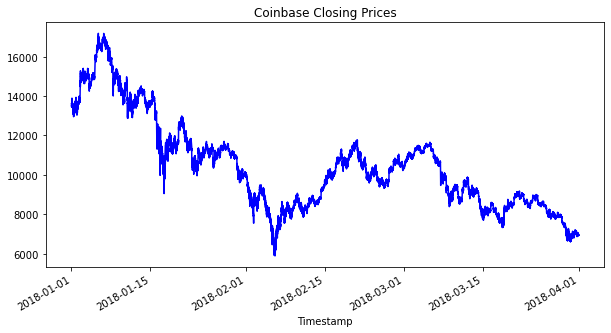

In [254]:
# Created a line plot for the bitstamp DataFrame for the full length of time in the dataset 

coinbase_close.plot(figsize=(10,5), title='Coinbase Closing Prices', color='blue')

<AxesSubplot:title={'center':'Bitstamp Closing Prices'}, xlabel='Timestamp'>

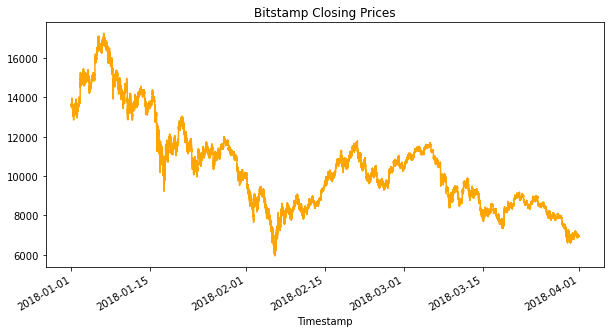

In [255]:
# Created a line plot for the coinbase DataFrame for the full length of time in the dataset 

bitstamp_close.plot(figsize=(10,5), title='Bitstamp Closing Prices', color='orange')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

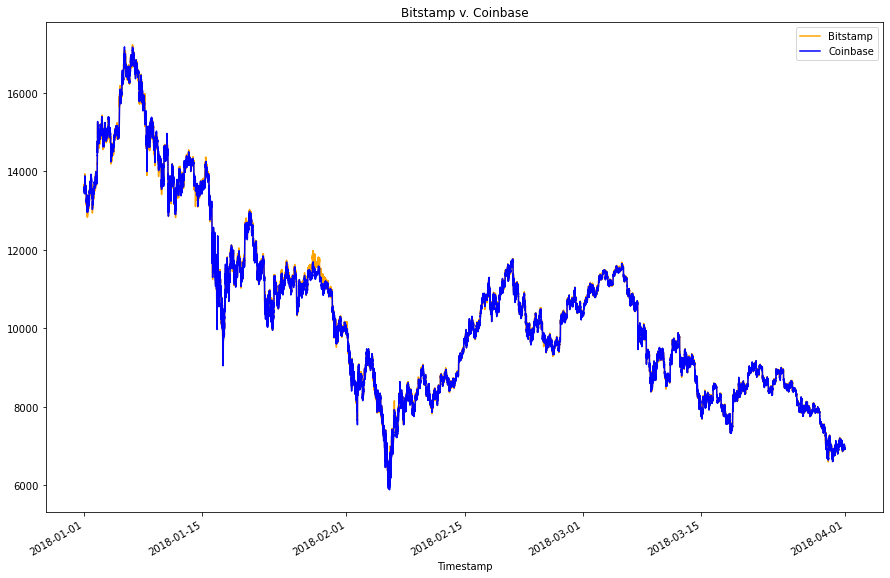

In [256]:
# Overlaid the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot visualizes the prices over the full lenth of the dataset

bitstamp_close.plot(legend=True, figsize=(15,10), title='Bitstamp v. Coinbase', color='orange', label = 'Bitstamp')
coinbase_close.plot(legend=True, figsize=(15,10), color='blue', label = 'Coinbase')

<AxesSubplot:title={'center':'January - Bitstamp v. Coinbase'}, xlabel='Timestamp'>

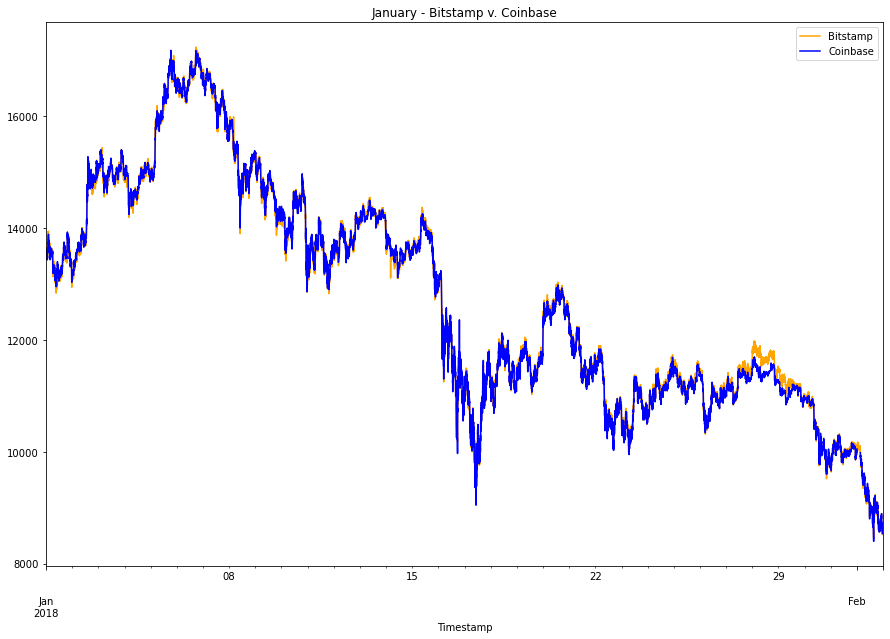

In [261]:
# Used the loc and plot functions to create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset

bitstamp_close.loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(15,10), title='January - Bitstamp v. Coinbase', color='orange', label = 'Bitstamp')
coinbase_close.loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(15,10), color='blue', label = 'Coinbase')

<AxesSubplot:title={'center':'February - Bitstamp v. Coinbase'}, xlabel='Timestamp'>

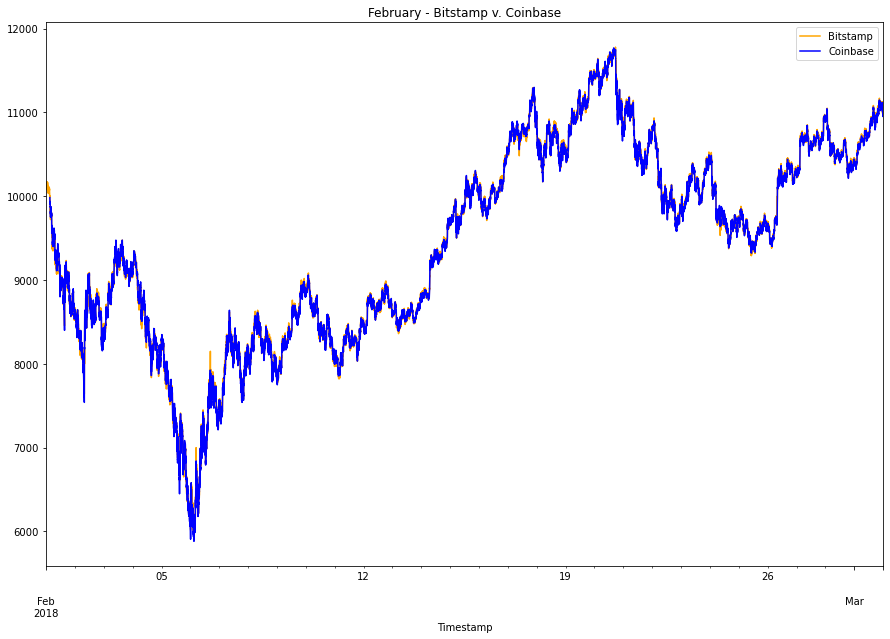

In [262]:
# Used the loc and plot functions to create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period in the middle of the dataset

bitstamp_close.loc['2018-02-01':'2018-03-01'].plot(legend=True, figsize=(15,10), title='February - Bitstamp v. Coinbase', color='orange', label = 'Bitstamp')
coinbase_close.loc['2018-02-01':'2018-03-01'].plot(legend=True, figsize=(15,10), color='blue', label = 'Coinbase')

<AxesSubplot:title={'center':'March - Bitstamp v. Coinbase'}, xlabel='Timestamp'>

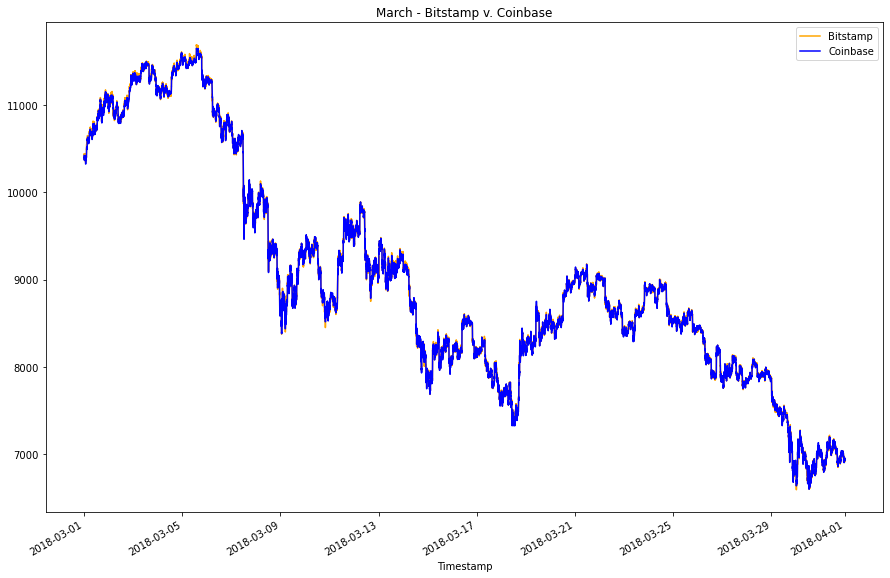

In [263]:
# Used the loc and plot functions to create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
 
bitstamp_close.loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize=(15,10), title='March - Bitstamp v. Coinbase', color='orange', label = 'Bitstamp')
coinbase_close.loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize=(15,10), color='blue', label = 'Coinbase')

**Question** Based on the visualizations of the different time periods, has the degree of spread changed as time progressed?

**Answer** After analyzing the the two data visuals over the month of January and the month of March, it seems that the degree of spead between Coinbase and Bitstamp shrank in that timeframe.

<AxesSubplot:title={'center':'January 28th, 2018 - Bitstamp v. Coinbase'}, xlabel='Timestamp'>

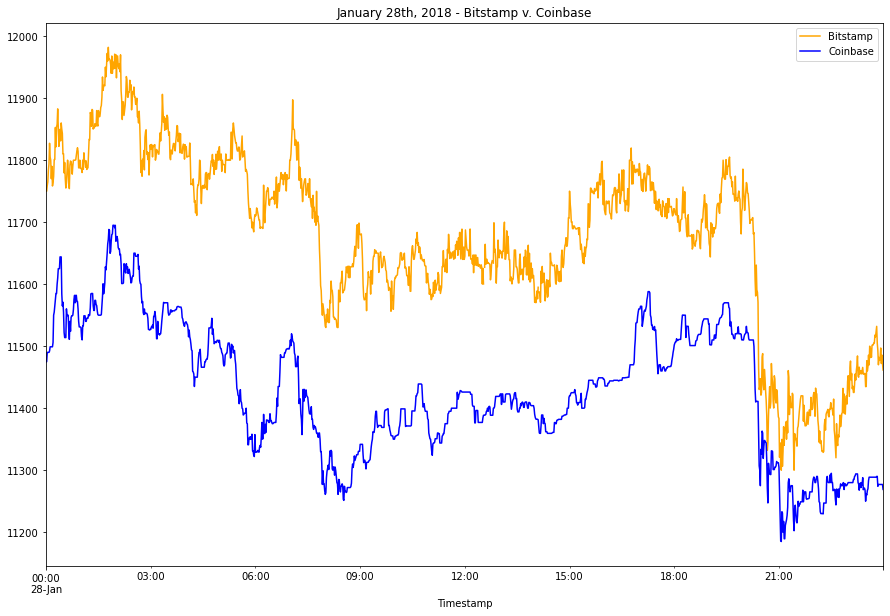

In [264]:
# Created an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 

bitstamp_close.loc['2018-01-28':'2018-01-28'].plot(legend=True, figsize=(15,10), title='January 28th, 2018 - Bitstamp v. Coinbase', color='orange', label = 'Bitstamp')
coinbase_close.loc['2018-01-28':'2018-01-28'].plot(legend=True, figsize=(15,10), color='blue', label = 'Coinbase')

In [273]:
# Used the early date to calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_early = bitstamp_close.loc['2018-01-28']- coinbase_close.loc['2018-01-28']

# Generated summary statistics for the early DataFrame

arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date'}>

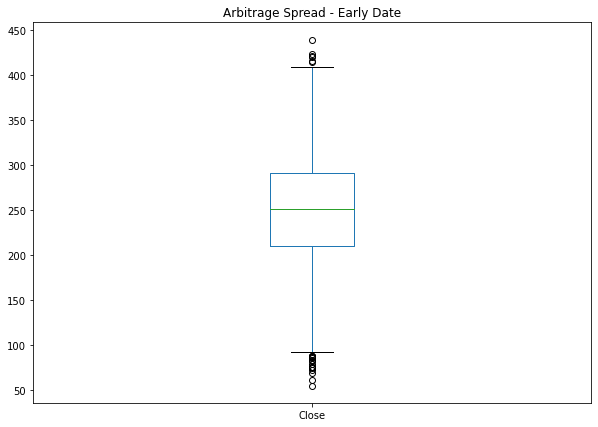

In [274]:
# Visualizing the arbitrage spread from early in the dataset in a box plot

arbitrage_spread_early.plot.box(legend=True, figsize=(10,7), title='Arbitrage Spread - Early Date')

<AxesSubplot:title={'center':'February 6th, 2018 - Bitstamp v. Coinbase'}, xlabel='Timestamp'>

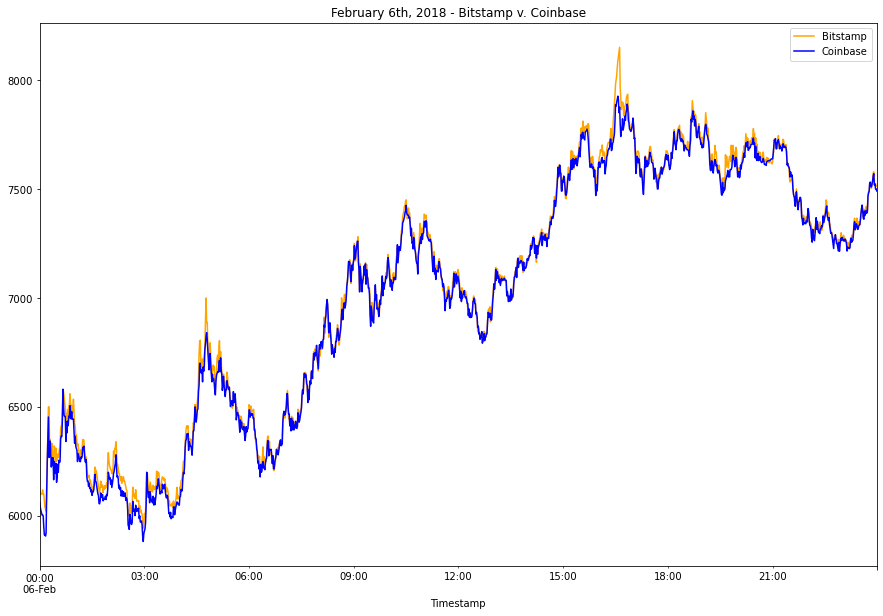

In [275]:
# Created an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 

bitstamp_close.loc['2018-02-06':'2018-02-06'].plot(legend=True, figsize=(15,10), title='February 6th, 2018 - Bitstamp v. Coinbase', color='orange', label = 'Bitstamp')
coinbase_close.loc['2018-02-06':'2018-02-06'].plot(legend=True, figsize=(15,10), color='blue', label = 'Coinbase')

In [276]:
# Used the date in the middle of the dataset to calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_middle = bitstamp_close.loc['2018-02-06']-coinbase_close.loc['2018-02-06']

# Generated summary statistics 

arbitrage_spread_middle.describe()

count    1440.000000
mean       23.841236
std        30.390321
min       -51.000000
25%         4.675000
50%        19.375000
75%        37.877500
max       280.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date'}>

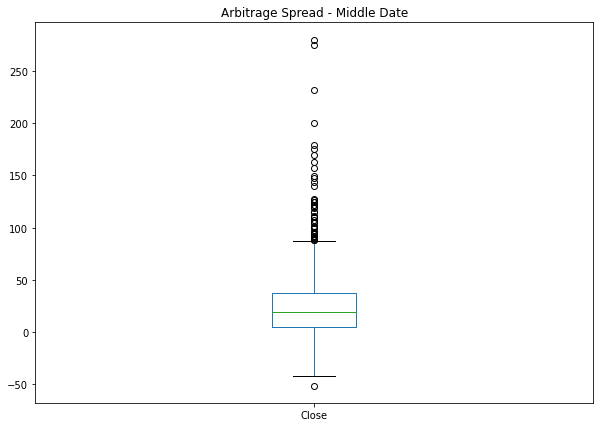

In [277]:
# Visualizing the arbitrage spread from the middle of the dataset in a box plot

arbitrage_spread_middle.plot.box(legend=True, figsize=(10,7), title='Arbitrage Spread - Middle Date')

<AxesSubplot:title={'center':'March 5th, 2018 - Bitstamp v. Coinbase'}, xlabel='Timestamp'>

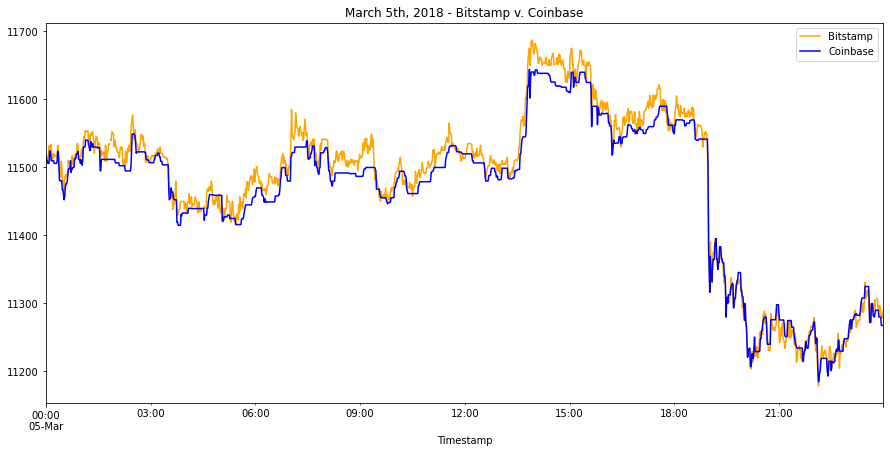

In [328]:
# Created an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 

bitstamp_close.loc['2018-03-05':'2018-03-05'].plot(legend=True, figsize=(15,7), title='March 5th, 2018 - Bitstamp v. Coinbase', color='orange', label = 'Bitstamp')
coinbase_close.loc['2018-03-05':'2018-03-05'].plot(legend=True, figsize=(15,7), color='blue', label = 'Coinbase')

In [329]:
# Used the date from the late part of the dataset to calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_late = bitstamp_close.loc['2018-03-05'] - coinbase_close.loc['2018-03-05']

# Generated summary statistics for the late DataFrame

arbitrage_spread_late.describe()

count    1437.000000
mean       11.817683
std        14.276780
min       -33.180000
25%         2.940000
50%        11.500000
75%        20.470000
max        68.280000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date'}>

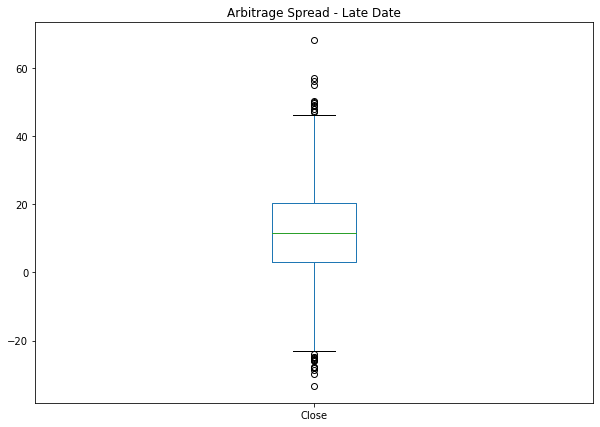

In [330]:
# Visualizing the arbitrage spread from late in the dataset in a box plot

arbitrage_spread_late.plot.box(legend=True, figsize=(10,7), title='Arbitrage Spread - Late Date')

In [331]:
# For the early date in the dataset, measured the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_early = bitstamp_close.loc['2018-01-28'] - coinbase_close.loc['2018-01-28']

# Used a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame

stats_arbitarage_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]
stats_arbitarage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [332]:
# For the date midway in the dataset, measured the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_middle = bitstamp_close.loc['2018-02-06'] - coinbase_close.loc['2018-02-06']

# Used a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame

stats_arbitarage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
stats_arbitarage_spread_middle.describe()

count    1177.000000
mean       31.294452
std        28.481383
min         0.010000
25%        13.000000
50%        24.530000
75%        42.540000
max       280.010000
Name: Close, dtype: float64

In [333]:
# For the date late in the dataset, measured the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_late = bitstamp_close.loc['2018-03-05'] - coinbase_close.loc['2018-03-05']

# Used a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame

stats_arbitarage_spread_late = arbitrage_spread_late[arbitrage_spread_late > 0]
stats_arbitarage_spread_late.describe()

count    1155.000000
mean       16.740208
std        10.860019
min         0.020000
25%         8.880000
50%        14.790000
75%        23.195000
max        68.280000
Name: Close, dtype: float64

In [334]:
# For the date early in the dataset, calculated the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_close.loc['2018-01-28']

# Reviewed the spread return DataFrame

spread_return_early

Timestamp
2018-01-28 00:00:00    0.023437
2018-01-28 00:01:00    0.023404
2018-01-28 00:02:00    0.022857
2018-01-28 00:03:00    0.023377
2018-01-28 00:04:00    0.024971
                         ...   
2018-01-28 23:55:00    0.019144
2018-01-28 23:56:00    0.017007
2018-01-28 23:57:00    0.018174
2018-01-28 23:58:00    0.017008
2018-01-28 23:59:00    0.016807
Name: Close, Length: 1440, dtype: float64

In [335]:
# For the date midway in the dataset, calculated the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_close.loc['2018-02-06']

# Reviewed the spread return DataFrame

spread_return_middle

Timestamp
2018-02-06 00:00:00    0.009983
2018-02-06 00:01:00    0.009852
2018-02-06 00:02:00    0.012449
2018-02-06 00:03:00    0.013933
2018-02-06 00:04:00    0.015752
                         ...   
2018-02-06 23:55:00         NaN
2018-02-06 23:56:00         NaN
2018-02-06 23:57:00    0.003260
2018-02-06 23:58:00    0.001534
2018-02-06 23:59:00    0.003147
Name: Close, Length: 1440, dtype: float64

In [336]:
# For the date late in the dataset, calculated the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_close.loc['2018-03-05']

# Reviewed the spread return DataFrame

spread_return_late

Timestamp
2018-03-05 00:00:00         NaN
2018-03-05 00:01:00    0.000031
2018-03-05 00:02:00    0.000412
2018-03-05 00:03:00    0.000802
2018-03-05 00:04:00    0.001052
                         ...   
2018-03-05 23:55:00    0.000203
2018-03-05 23:56:00    0.001391
2018-03-05 23:57:00    0.000928
2018-03-05 23:58:00    0.000966
2018-03-05 23:59:00    0.001850
Name: Close, Length: 1440, dtype: float64

In [337]:
# For the date early in the dataset, determined the number of times the trades with positive returns 
# exceeded the 1% minimum threshold (.01)

profitable_trades_early = spread_return_early[spread_return_early>.01]

# Reviewed the first five profitable trades

profitable_trades_early.head()

Timestamp
2018-01-28 00:00:00    0.023437
2018-01-28 00:01:00    0.023404
2018-01-28 00:02:00    0.022857
2018-01-28 00:03:00    0.023377
2018-01-28 00:04:00    0.024971
Name: Close, dtype: float64

In [338]:
# For the date midway in the dataset, determined the number of times the trades with positive returns 
# exceeded the 1% minimum threshold (.01)

profitable_trades_middle = spread_return_middle[spread_return_middle>.01]

# Reviewed the first five profitable trades

profitable_trades_middle.head()

Timestamp
2018-02-06 00:02:00    0.012449
2018-02-06 00:03:00    0.013933
2018-02-06 00:04:00    0.015752
2018-02-06 00:05:00    0.018794
2018-02-06 00:06:00    0.016411
Name: Close, dtype: float64

In [339]:
# For the date late in the dataset, determined the number of times the trades with positive returns 
# exceeded the 1% minimum threshold (.01)

profitable_trades_late = spread_return_late[spread_return_late>.01]

# Reviewed the first five profitable trades

profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

In [340]:
# For the date early in the dataset, generated the summary statistics for the profitable trades
# or where the spread returns are are greater than 1%

profitable_trades_early.describe()

count    1377.000000
mean        0.021700
std         0.005179
min         0.010006
25%         0.018666
50%         0.021711
75%         0.024784
max         0.037082
Name: Close, dtype: float64

In [341]:
# For the date midway in the dataset, generated the summary statistics for the profitable trades
# or where the spread returns are are greater than 1%

profitable_trades_middle.describe()

count    109.000000
mean       0.014122
std        0.005092
min        0.010002
25%        0.010811
50%        0.012063
75%        0.015566
max        0.035665
Name: Close, dtype: float64

In [342]:
# For the date late in the dataset, generated the summary statistics for the profitable trades
# or where the spread returns are are greater than 1%

profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [343]:
# For the date early in the dataset, calculated the potential profit per trade in dollars 
# Multiplied the profitable trades by the cost of the Bitcoin that was purchased

profit_early = profitable_trades_early * coinbase_close.loc['2018-01-28']

# Dropped any missing values from the profit DataFrame

profit_per_trade_early = profit_early.dropna()

# Viewed the early profit DataFrame

profit_per_trade_early

Timestamp
2018-01-28 00:00:00    268.926030
2018-01-28 00:01:00    268.563830
2018-01-28 00:02:00    262.626724
2018-01-28 00:03:00    268.600644
2018-01-28 00:04:00    286.912140
                          ...    
2018-01-28 23:55:00    215.886408
2018-01-28 23:56:00    191.791693
2018-01-28 23:57:00    204.946386
2018-01-28 23:58:00    191.801356
2018-01-28 23:59:00    189.392562
Name: Close, Length: 1377, dtype: float64

In [344]:
# For the date midway in the dataset, calculated the potential profit per trade in dollars 
# Multiplied the profitable trades by the cost of the Bitcoin that was purchased

profit_middle = profitable_trades_middle * bitstamp_close.loc['2018-02-06']

# Dropped any missing values from the profit DataFrame

profit_per_trade_middle = profit_middle.dropna()

# Viewed the early profit DataFrame

profit_per_trade_middle

Timestamp
2018-02-06 00:02:00     75.95
2018-02-06 00:03:00     84.99
2018-02-06 00:04:00     96.09
2018-02-06 00:05:00    115.00
2018-02-06 00:06:00    100.11
                        ...  
2018-02-06 17:05:00     81.00
2018-02-06 19:39:00    119.18
2018-02-06 19:41:00     92.51
2018-02-06 19:46:00     94.79
2018-02-06 19:49:00    110.55
Name: Close, Length: 109, dtype: float64

In [345]:
# For the date late in the dataset, calculated the potential profit per trade in dollars 
# Multiplied the profitable trades by the cost of the Bitcoin that was purchased

profit_late = profitable_trades_late * bitstamp_close.loc['2018-03-05']

# Dropped any missing values from the profit DataFrame

profit_per_trade_late = profit_late.dropna()

# Viewed the early profit DataFrame

profit_per_trade_late

Series([], Name: Close, dtype: float64)

In [346]:
# Generated the summary statistics for the early profit per trade DataFrame

profit_per_trade_early.describe()

count    1377.000000
mean      248.200339
std        59.306210
min       112.829571
25%       213.329975
50%       248.654029
75%       285.699300
max       422.730772
Name: Close, dtype: float64

In [347]:
# Generated the summary statistics for the midway profit per trade DataFrame

profit_per_trade_middle.describe()

count    109.000000
mean      95.182202
std       41.231214
min       61.690000
25%       68.220000
50%       80.330000
75%      106.970000
max      280.010000
Name: Close, dtype: float64

In [348]:
# Generated the summary statistics for the late profit per trade DataFrame

profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'January 28th, 2018 - Bitcoin Profits'}, xlabel='Timestamp'>

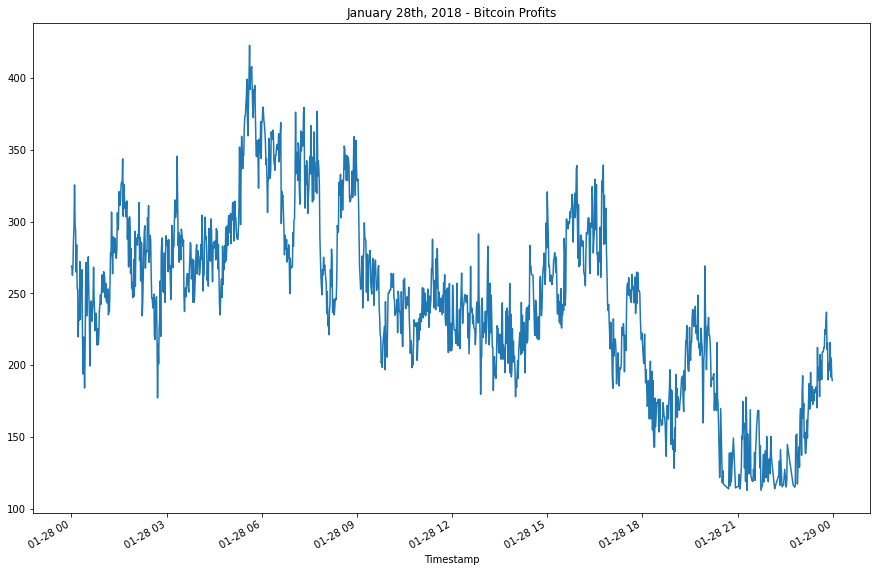

In [349]:
# Plotted the results for the early profit per trade DataFrame

profit_per_trade_early.plot(figsize=(15,10),
 title='January 28th, 2018 - Bitcoin Profits')

<AxesSubplot:title={'center':'February 6th, 2018 - Bitcoin Profits'}, xlabel='Timestamp'>

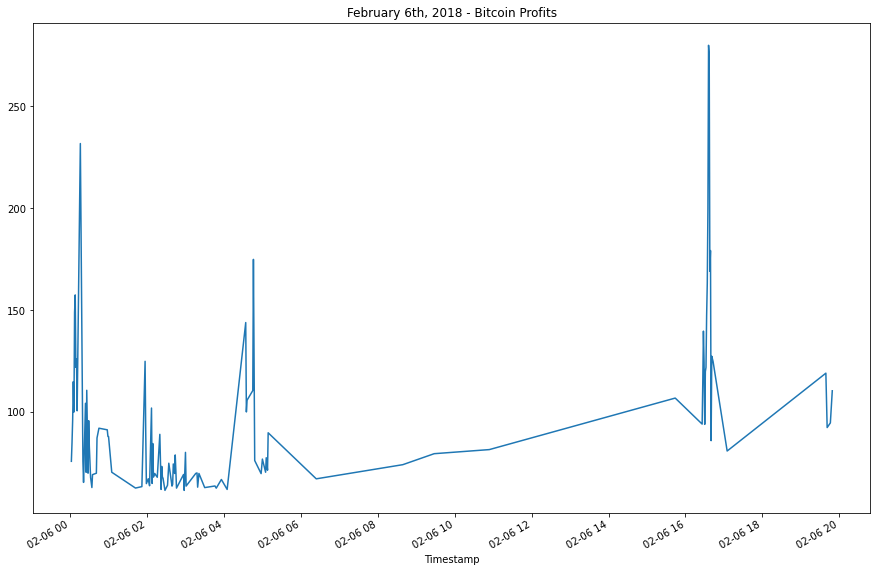

In [350]:
# Plotted the results for the midway profit per trade DataFrame

profit_per_trade_middle.plot(figsize=(15,10), title='February 6th, 2018 - Bitcoin Profits')

<AxesSubplot:title={'center':'March 5th, 2018 - Bitcoin Profits'}, xlabel='Timestamp'>

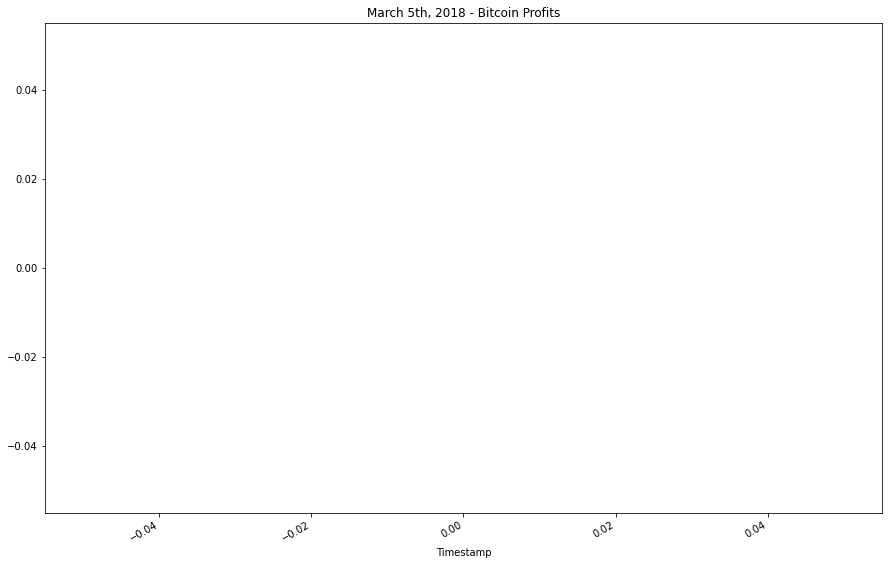

In [351]:
# Ploted the results for the late profit per trade DataFrame

profit_per_trade_late.plot(figsize=(15,10), title='March 5th, 2018 - Bitcoin Profits')

In [352]:
# Calculated the sum of the potential profits for the early profit per trade DataFrame

profit_early_sum = profit_per_trade_early.sum()
profit_early_sum

341771.86634198617

In [353]:
# Calculated the sum of the potential profits for the midway profit per trade DataFrame

profit_middle_sum = profit_per_trade_middle.sum()
profit_middle_sum

10374.859999999993

In [354]:
# Calculated the sum of the potential profits for the late profit per trade DataFrame

profit_late_sum = profit_per_trade_late.sum()
profit_late_sum

0.0

In [355]:
# Used the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame

cumulative_profit_early = profit_per_trade_early.cumsum()

In [356]:
# Used the cumsum function to calculate the cumulative profits over time for the midway profit per trade DataFrame

cumulative_profit_middle = profit_per_trade_middle.cumsum()

In [357]:
# Used the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame

cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - Early'}, xlabel='Timestamp'>

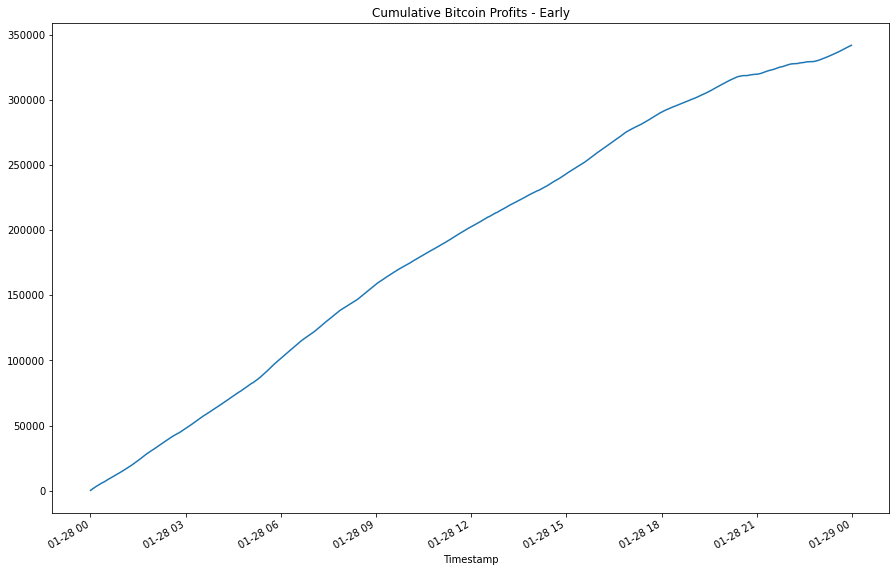

In [358]:
# Plotted the cumulative sum of profits for the early profit per trade DataFrame

cumulative_profit_early.plot(figsize=(15,10), title='Cumulative Bitcoin Profits - Early')

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - Middle'}, xlabel='Timestamp'>

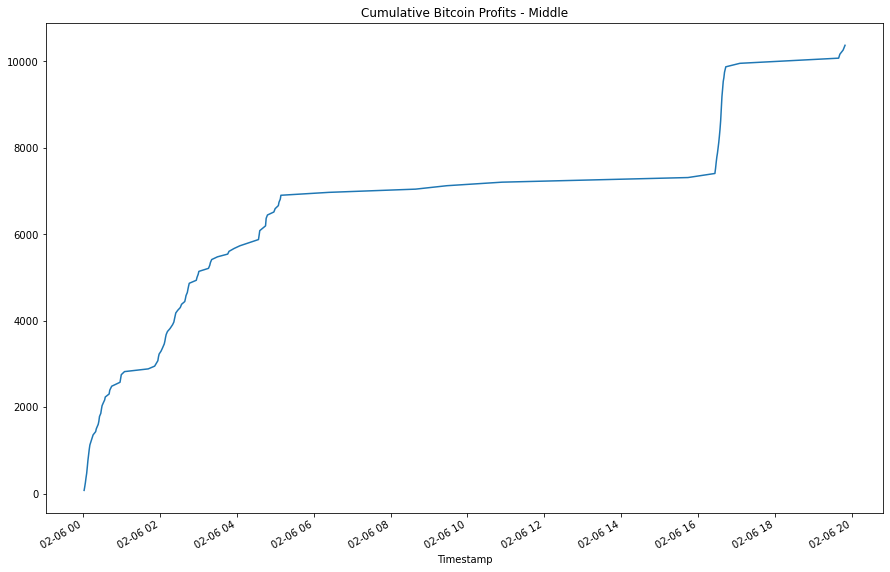

In [359]:
# Plotted the cumulative sum of profits for the midway profit per trade DataFrame

cumulative_profit_middle.plot(figsize=(15,10), title='Cumulative Bitcoin Profits - Middle')

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - Late'}, xlabel='Timestamp'>

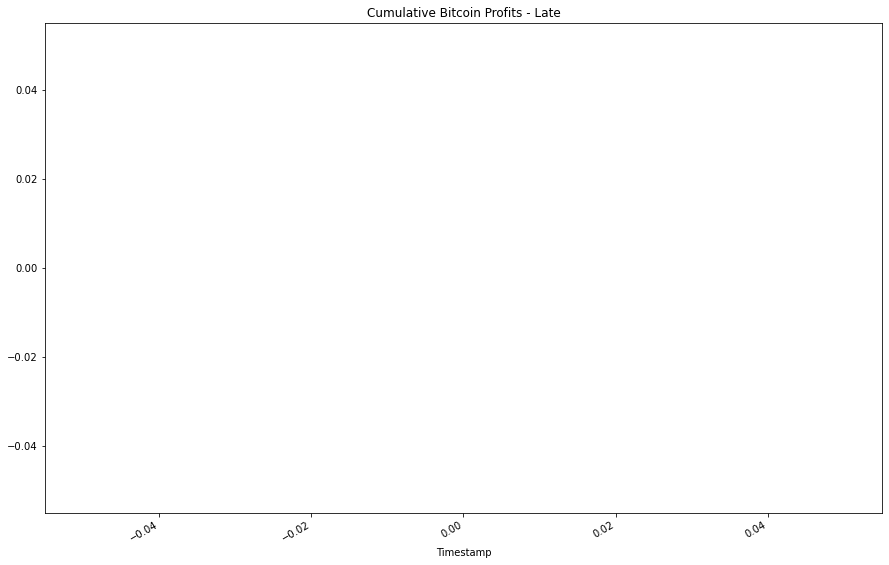

In [360]:
# Plotted the cumulative sum of profits for the late profit per trade DataFrame

cumulative_profit_late.plot(figsize=(15,10), title='Cumulative Bitcoin Profits - Late')

In [ ]:
**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** After analyzing the profit information across each data set, it seems that the over time with Bitcoins popularity the price difference between the two exchanges shrinks and falls below the 1% minimum profit threshold.